### 3차원 데이터의 합성곱 연산


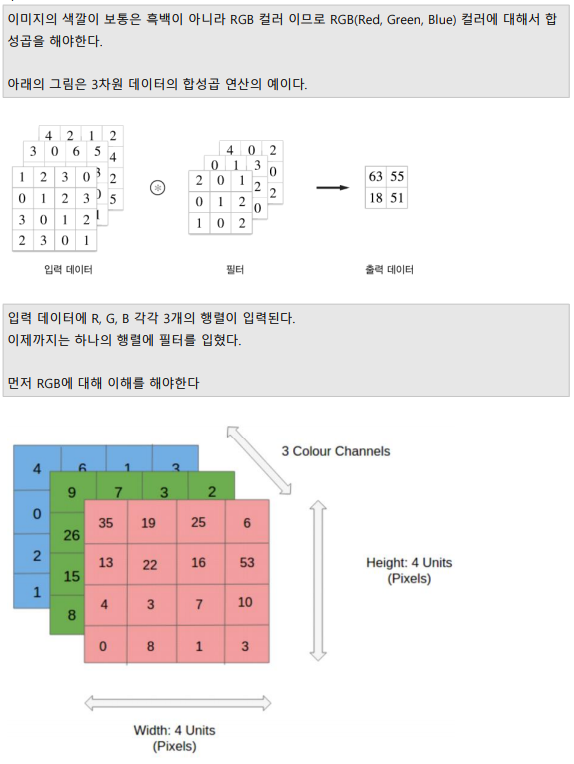

In [17]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

문제 186) 레나 사진을 3차원 행렬로 변환하시오

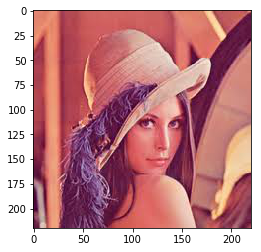

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
##5.1. 원본 이미지 불러오기
img = Image.open("C:\\Users\\QIA\\Desktop\\다운로드.jpg")
img_pixel = np.array(img)
plt.imshow(img_pixel)

문제 187) 한지민 사진에서 Red 행렬만 출력하고 Red 행렬만 시각화 하시오

[[230 230 229 ... 220 232 209]
 [229 229 229 ... 227 234 216]
 [229 229 228 ... 194 177 154]
 ...
 [ 84  92  98 ... 127 141 149]
 [ 81  87  95 ... 140 154 163]
 [ 77  86  92 ... 150 163 170]]


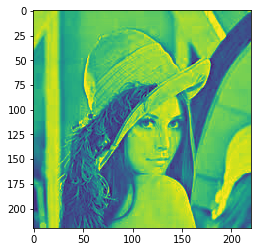

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
##5.1. 원본 이미지 불러오기
img = Image.open("C:\\Users\\QIA\\Desktop\\다운로드.jpg")
img_pixel = np.array(img)
plt.imshow(img_pixel[:,:,0])
print(img_pixel[:,:,0])

문제 197) 아래의 원본 이미지인 data 행렬과 filter 행렬을 3차원 합성곱 하기 위한 그림을 이해하시오


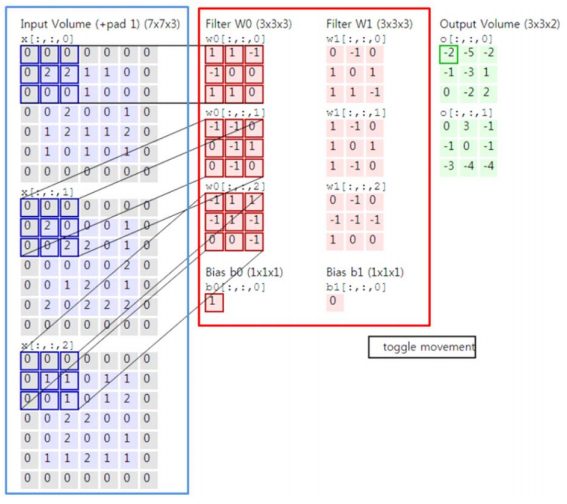

In [22]:
data = np.array([[[2, 2, 1, 1, 0],
 [0, 0, 1, 0, 0],
 [0, 2, 0, 0, 1],
 [1, 2, 1, 1, 1],
 [1, 0, 1, 0, 1]],
 [[2, 0, 0, 0, 1],
 [0, 2, 2, 0, 1],
 [0, 0, 0, 0, 2],
 [0, 1, 2, 0, 1],
 [2, 0, 2, 2, 2]],
 [[4, 2, 1, 2, 2],
 [0, 1, 0, 4, 2],
 [3, 0, 6, 2, 2],
 [4, 2, 4, 5, 2],
 [3, 4, 1, 0, 0]]
 ])
Filter=np.array([[[1,1,-1,-1,0,0,1,1,0], \
 [-1,-1,0,0,-1,1,0,-1,0], \
 [-1,1,1,-1,1,-1,0,0,-1]]]).reshape(3,3,3)

Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

#### 패딩과 Feature map의 shape과의 관계

    이미지의 특징(feature map) 을 추출하는 과정
    filter(가중치) 를 이용해서 추출한다
    원본이미지 1장 * 필터 50개 = feature map의 개수 (50개)
    　　7 x 7 　　　　3 x 3　　　 　　　7 x 7
    패딩을 2로 해주면 입력값과 동일한 shape의 feature map이 출력된다
    
### Convolution 층을 통과한 출력 이미지의 사이즈 계산방법
문제 207) 아래와 같이 입력 행렬과 필터 행렬과 스트라이드와 패딩을 입력받아 출력 행렬의 shape을 출력하는 함수를 생성하시오

In [ ]:
a = np.array([[[2, 2, 1, 1, 0], [0, 0, 1, 0, 0], [0, 2, 0, 0, 1], [1, 2, 1, 1, 2], [1, 0, 1, 0, 1]],
 [[2, 0, 0, 0, 1], [0, 2, 2, 0, 1], [0, 0, 0, 0, 2], [0, 1, 2, 0, 1], [2, 0, 2, 2, 2]],
 [[1, 1, 0, 1, 1], [0, 1, 0, 1, 2], [0, 2, 2, 0, 0], [0, 2, 0, 0, 1], [1, 1, 2, 1, 1]]])
Filter = np.array([[[1, 1, -1, -1, 0, 0, 1, 1, 0], [-1, -1, 0, 0, -1, 1, 0, -1, 0], [-1, 1, 1, -1, 1, -1, 0, 0, -1]]]).reshape(3, 3, 3)
def output(data, Filter, S, P):
    H = len(data)
    W = len(data[0])
    FH = len(Filter)
    FW = len(Filter[0])

    return (H + 2*P - FH / S) + 1
output(a, Filter, 1, 2)

### 블록으로 생각하기

    " 3차원 합성곱연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉽다"
    블록은 3차원 직육면체 (채널, 높이, 너비)로 구성됨
    필터의 채널(C), 필터의 높이(FH), 필터의 너비(FW)

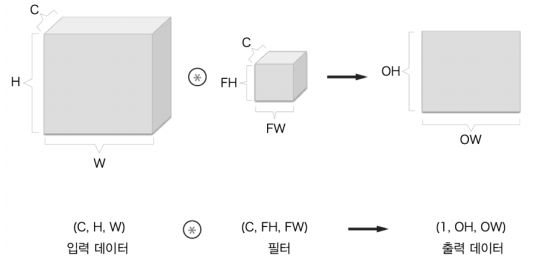

In [23]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

    설명)
    아이린 사진 한장 (RGB) 를 RGB 필터로 합성곱해서 2차원 출력행렬 (feature map) 1장 출력
    
    위의 그림은 feature map이 한 개가 나오고 있는데 실제로는 아이린 사진 1장에 대해서 여러 개의 feature map이 필요하다
    
    즉, Filter의 개수를 늘려야 한다

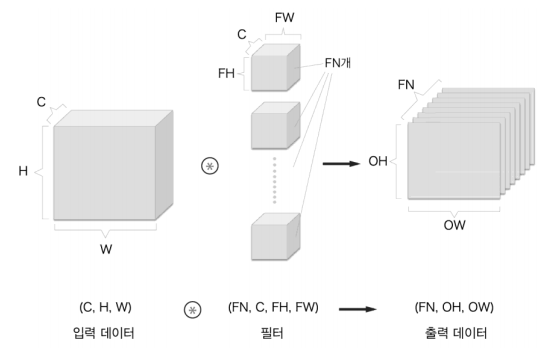

In [24]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

### 배치 처림
합성곱 연산에서도 편향이 쓰이므로 편향을 더하면 어떤 그림일까?


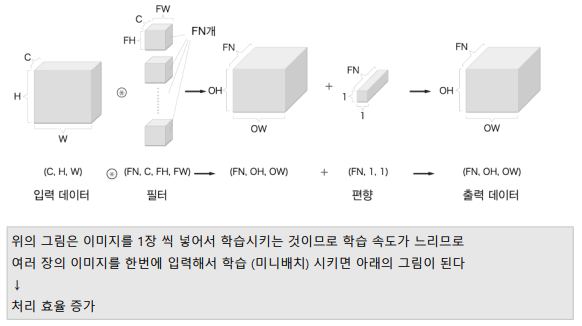

In [25]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

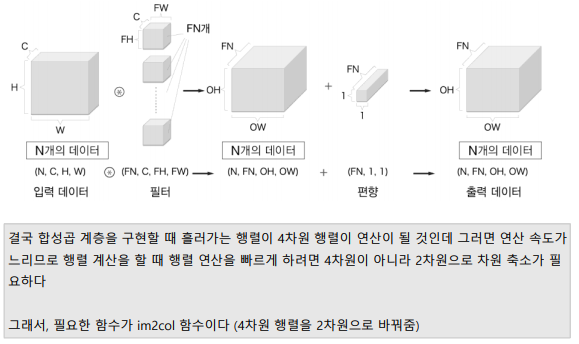

In [26]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

<hr>
## 풀링 계층

    : 풀링은 세로, 가로 방향의 공간을 줄이는 연산


##### 풀링 계층의 특징
1. 학습해야 할 매개변수가 없다
2. 채널 수가 변하지 않는다
3. 입력의 변화에 영향을 적게 받는다

##### 풀링의 종류
1. 최대풀링 : 컨볼루션 데이터에서 가장 큰 값을 대표값으로 선정
2. 평균풀링 : 컨볼루션 데이터에서 모든 값의 평균 값을 대표값으로 선정
3. 확률적 풀링 : 컨볼루션 데이터에서 임의 확률로 한 개를 선정

<hr>
## 합성곱/풀링 계층 구현하기

### 4차원 배열
문제 209) 칠판에 나온 아이린 사진이라 생각하고 한장의 4차원 행렬을 만드시오
(RGB의 7 x 7 행렬 1장)


In [1]:
import numpy as np
x1= np.random.rand(1,3,7,7)
print(x1.shape)

(1, 3, 7, 7)
